In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, MultiLabelBinarizer, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
import pickle
import re

df = pd.read_csv(r'../preprocessed_data/대구콘서트하우스/대구콘서트하우스_preprocessed.csv', index_col = 0)
display(df)

C:\Users\passion\Anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


,전송사업자코드,공연코드,공연회차,소요시간,장르명,세부장르명,출연진내용,제작진내용,기획제작사명,관람연령,...,공연시작요일,공연시작시분,공연기간,공휴일여부,좌석등급개수,평균티켓가격,좌석점유율,코로나표준점수,검색량,출연횟수
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,SE000102,PF360097,1,90,서양음악(클래식),기악,한성원,NaN,대구콘서트하우스(주최),만 6세 이상,...,Tuesday,1170,1,0,1,10000.0,0.995968,0,0,7
1,SE000102,PF360828,1,70,서양음악(클래식),기악,"최민정, 배규희, 우현수, 정혜진, 남자은",NaN,대구콘서트하우스(주최),만 7세 이상,...,Tuesday,1170,1,0,1,10000.0,0.983871,0,0,4
2,SE000303,PF373182,1,60,서양음악(클래식),기악,"김은지, 오은비, 형성경, 신유리",NaN,"블랑앳누아(주최), 블랑앳누아(주관)",만 7세 이상,...,Saturday,1170,1,0,1,10000.0,0.024194,0,0,2
3,SE000102,PF360028,1,70,서양음악(클래식),성악,"권재희, 정지은",NaN,대구콘서트하우스(주최),만 7세 이상,...,Friday,1170,1,0,1,10000.0,0.754032,0,0,2
4,SE000102,PF373483,1,90,서양음악(클래식),기악,주석용,NaN,"대구콘서트하우스(주최), 대구콘서트하우스(기획사)",만 7세 이상,...,Friday,1170,1,0,1,10000.0,0.991935,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,SE000102,PF425546,1,80,서양음악(클래식),성악,"이정아, 배혜리, 이영규, 백민아, 구은정, 최민영, 김아름 등",NaN,"더 소프라노즈(주최), 더 소프라노즈(주관)",만 7세 이상,...,Wednesday,1170,1,0,1,20000.0,1.362903,0,0,10
306,SE000201,PF424911,1,90,서양음악(클래식),기악,"이호찬, 박상욱",NaN,"대구콘서트하우스(주최), 대구콘서트하우스(주관)",만 7세 이상,...,Friday,1170,1,0,1,30000.0,0.596774,0,520,14
307,SE000201,PF424030,1,90,대중음악,재즈/월드뮤직,"김우연, 김재원, 김종호, 이찬희, 고상지",NaN,"대구콘서트하우스(주최), 대구콘서트하우스(주관)",만 7세 이상,...,Tuesday,1170,1,0,1,10000.0,0.959677,0,1930,155


In [6]:
df.drop(['전송사업자코드','공연회차','오픈런 여부','제작진내용', '공연기간', '출연진내용'], axis = 1, inplace = True)

In [5]:
#관람연령 결측치는 최빈값으로 대체
df['관람연령'] = df['관람연령'].fillna('만 7세 이상')

#관람연령은 연령순대로 labelencoding
age_dict = {'전체 관람가':0, '12개월 이상': 1, '24개월 이상':2, '36개월 이상':3, '48개월 이상':4, '만 4세 이상':4, '만 5세 이상':5, 
            '만 6세 이상':6, '만 7세 이상':7, '만 8세 이상':8, '만 11세 이상':9, '만 13세 이상': 10}
df['관람연령'] = df['관람연령'].map(age_dict)

#기획제작사명 괄호 제거 및 리스트화
df['기획제작사명_전처리'] = df['기획제작사명'].apply(lambda x: ['Unknown'] if pd.isna(x) else re.sub(r'\([^)]*\)', '', x.replace(" ", "")).split(','))

df.reset_index(drop = True, inplace = True)

In [8]:
#아동공연 여부, 축제 여부, 내한공연 여부, 단독판매 여부를 이진값으로 변환
ny_dict = {'N':0 , 'Y':1}
df['아동공연 여부'] = df['아동공연 여부'].map(ny_dict)
df['축제 여부'] = df['축제 여부'].map(ny_dict)
df['내한공연 여부'] = df['내한공연 여부'].map(ny_dict)
df['단독판매여부'] = df['단독판매여부'].map(ny_dict)

In [9]:
#장르명 열과 세부장르명 열은 통합
df['장르_세부'] = df['장르명']+'_'+df['세부장르명']
df['장르_세부'].unique()
df.drop(['장르명','세부장르명','기획제작사명'], axis = 1, inplace = True)

In [14]:
#공연시작요일 onehotencoding
oe = OneHotEncoder()
one_hot_df = oe.fit_transform(df['공연시작요일'].values.reshape(-1,1)).toarray()
one_hot_df = pd.DataFrame(one_hot_df, columns = ['dayofweek_fri','dayofweek_mon','dayofweek_sat','dayofweek_sun','dayofweek_thu', 'dayofweek_tue','dayofweek_wed'])
print(one_hot_df.shape)

(278, 7)


In [15]:
df = pd.concat([df, one_hot_df], axis = 1)

In [18]:
X = df.drop(['공연코드', '좌석점유율'], axis = 1)
y = df['좌석점유율']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(222, 26)
(56, 26)
(222,)
(56,)


In [19]:
X_train.reset_index(drop = True, inplace = True)
X_test.reset_index(drop = True, inplace = True)

In [20]:
y_train.reset_index(drop = True, inplace = True)
y_test.reset_index(drop = True, inplace = True)

In [21]:
#장르 onehotencoding
oe2 = OneHotEncoder(handle_unknown = 'ignore') 
oe2.fit(X_train['장르_세부'].values.reshape(-1,1))
one_hot_trn =oe2.transform(X_train['장르_세부'].values.reshape(-1,1)).toarray()
one_hot_trn = pd.DataFrame(one_hot_trn, columns = oe2.categories_[0])
print(one_hot_trn.shape)

(222, 12)


In [22]:
one_hot_tes = oe2.transform(X_test['장르_세부'].values.reshape(-1,1)).toarray()
one_hot_tes = pd.DataFrame(one_hot_tes, columns = oe2.categories_[0])
print(one_hot_tes.shape)

(56, 12)


In [23]:
mlb = MultiLabelBinarizer()
mlb.fit(X_train['기획제작사명_전처리'])
mlb_trn = mlb.transform(X_train['기획제작사명_전처리'])
mlb_trn = pd.DataFrame(mlb_trn, columns = mlb.classes_)
print(mlb_trn.shape)

(222, 80)


In [24]:
mlb_tes = mlb.transform(X_test['기획제작사명_전처리'])
mlb_tes = pd.DataFrame(mlb_tes, columns = mlb.classes_)
print(mlb_tes.shape)

(56, 80)


C:\Users\vmffl\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:895: UserWarning: unknown class(es) ['C.A.R', 'GGT동성기획', '공간울림', '노스텍사스대학교음악대학한국동문회', '다원예술위원회', '대구가톨릭대학교', '대구혼앙상블', '더소프라노즈', '소리모아플루트앙상블', '영남대학교', '예성기획', '예술전문단체올웨이코리아', '오푸스', '음악교육신문사', '인어스브라스앙상블', '재한일본여성합창단이코이', '지트리아트컴퍼니'] will be ignored
  warnings.warn(


In [25]:
X_train = pd.concat([X_train, one_hot_trn, mlb_trn], axis = 1)
X_test = pd.concat([X_test, one_hot_tes, mlb_tes], axis = 1)

In [26]:
X_train.drop(['공연시작요일','기획제작사명_전처리','장르_세부'], axis = 1, inplace = True)
X_test.drop(['공연시작요일','기획제작사명_전처리','장르_세부'], axis = 1, inplace = True)

### RandomForestRegressor

In [27]:
rf = RandomForestRegressor(n_estimators = 5000, max_features = "log2",  random_state = 40, criterion = 'friedman_mse')
rf.fit(X_train, y_train)
trn_pred = rf.predict(X_train)
tes_pred = rf.predict(X_test)

In [24]:
print(mean_squared_error(y_train, trn_pred))
print(np.sqrt(mean_squared_error(y_train, trn_pred)))
print(mean_absolute_error(y_train, trn_pred))

0.00525347058613905
0.07248082909389937
0.05705699983100734


In [24]:
print(mean_squared_error(y_test, tes_pred))
print(np.sqrt(mean_squared_error(y_test, tes_pred)))
print(mean_absolute_error(y_test, tes_pred))

0.033105401688033685
0.18194889856229876
0.14188774086840225


### GBM

In [277]:
gbm = GradientBoostingRegressor(n_estimators = 150, learning_rate = 0.15, loss = 'huber',criterion = 'squared_error'
                                ,alpha = 0.7, random_state=40)
gbm.fit(X_train, y_train)
trn_pred2 = gbm.predict(X_train)
tes_pred2 = gbm.predict(X_test)

In [26]:
print(mean_squared_error(y_train, trn_pred2))
print(mean_squared_error(y_train, trn_pred2,squared = False))
print(mean_absolute_error(y_train, trn_pred2))

0.012707858695633718
0.11272913862721438
0.06584253413663606


In [26]:
print(mean_squared_error(y_test, tes_pred2))
print(mean_squared_error(y_test, tes_pred2, squared = False))
print(mean_absolute_error(y_test, tes_pred2))

0.029973413251011143
0.1731283144116269
0.11459806235821131


In [267]:
import matplotlib.font_manager
import matplotlib.pyplot as plt

font_list = matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
[matplotlib.font_manager.FontProperties(fname=font).get_name() for font in font_list if 'Nanum' in font]

['NanumSquare Neo Light',
 'NanumSquareRoundOTF',
 'NanumSquare Neo Heavy',
 'NanumSquare Neo ExtraBold',
 'NanumSquare Neo Regular',
 'NanumSquareRoundOTF',
 'NanumGothic',
 'NanumSquare Neo Bold',
 'NanumSquareOTF_ac',
 'NanumSquareOTF_ac',
 'NanumSquareRoundOTF',
 'NanumSquareOTF_ac',
 'NanumSquareOTF',
 'NanumSquareOTF',
 'NanumSquareOTF_ac',
 'NanumSquareOTF',
 'NanumSquareRoundOTF',
 'NanumSquareOTF']

In [268]:
plt.rcParams['font.family'] = 'Malgun Gothic'

In [ ]:
y_data = pd.concat([y_train, y_test])
y_data.reset_index(drop = True, inplace = True)

In [ ]:
X_data = pd.concat([X_train, X_test])
X_data.reset_index(drop = True, inplace = True)

In [282]:
gbm_all = GradientBoostingRegressor(n_estimators = 150, learning_rate = 0.15, loss = 'huber',criterion = 'squared_error'
                                ,alpha = 0.7, random_state=40)
gbm_all.fit(X_data, y_data)
fin_pred = gbm_all.predict(X_data)

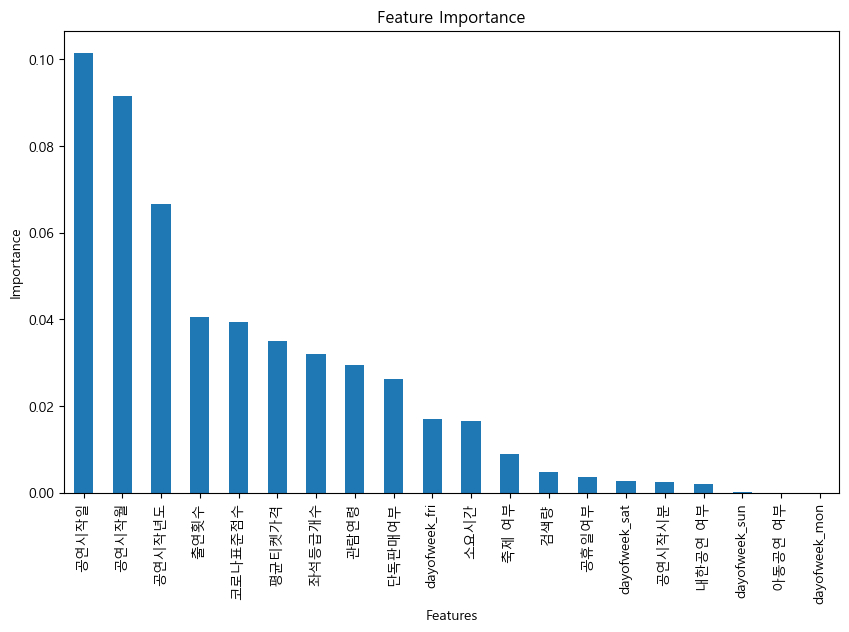

In [284]:
# imp를 활용하여 Series 생성
imp = gbm_all.feature_importances_[:20]
forest_importances = pd.Series(imp, index=X_train.columns[:20])

# 중요도 값을 기준으로 내림차순으로 정렬
forest_importances_sorted = forest_importances.sort_values(ascending=False)
#print(forest_importances_sorted.index[:20])


plt.figure(figsize=(10, 6))
forest_importances_sorted.plot(kind='bar')
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()


In [285]:
filename = '../model/gbm_fin_model_dae.sav'
pickle.dump(gbm_all, open(filename, 'wb'))

In [286]:
X_data['좌석점유율'] = y_data

In [288]:
X_data.to_csv('../preprocessed_data/대구콘서트하우스/모델학습및테스트데이터_최종.csv')

### XG boost

In [28]:
xgb_model = XGBRegressor(learning_rate=0.06, n_estimators=300, random_state = 42, max_depth = 10)
xgb_model.fit(X_train, y_train)
trn_pred3 = xgb_model.predict(X_train)
tes_pred3 = xgb_model.predict(X_test)

In [30]:
print(mean_squared_error(y_train, trn_pred3))
print(mean_squared_error(y_train, trn_pred3, squared = False))
print(mean_absolute_error(y_train, trn_pred3))

3.7562598671876984e-06
0.001938107289906237
0.0011874606151501186


In [31]:
print(mean_squared_error(y_test, tes_pred3))
print(mean_squared_error(y_test, tes_pred3, squared = False))
print(mean_absolute_error(y_test, tes_pred3))

0.03462855320621841
0.18608748804317396
0.13364697595247613
